# Hate speech and offensive language detection

![hate](hate.jpg)

Hate speech is any form of expression through which speakers intend to vilify, humiliate, or incite hatred against a group or a class of persons on the basis of race, religion, skin color sexual identity, gender identity, ethnicity, disability, or national origin.

With the advent of social networks, the phenomenon of 'hate speech' has increased despite the official policy of all main social networks that prohibits hate speech. As part of the data scientists team at Twitter (one of the main social networks through which people can share offensive or hateful tweets) our project aims to develop an algorithm that can classify a tweet (or more generally a text) as offensive (or not offensive).

![tweets_hate](twitter_hate.jpg)

A central challenge for automatic hate speech detection is the separation between hate speech from other istances of offensive language. In many cases, swear words are used in a non-offensive manner and are not part of hate speech.
For example a tweet cointaining rap lyrics with potentially offensive language should not be regarded at the same way as a tweet that directs racist slurs at another user.

The code will be developed in Python and will be integrated into an application with a graphical interface in which the user can test its operation by entering any kind of text. 
The algorithm is developed for texts in the English language only.

## Summary

blablabla

## Loading the data

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
hate_speech_df = pd.read_csv("Datasets/Dataset1_labeled_data.csv")

In [4]:
hate_speech_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
hate_speech_df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
hate_speech_df = hate_speech_df.drop(columns=['Unnamed: 0'])

In [7]:
hate_speech_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
hate_speech_df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


## Description of columns

The columns of the dataset 

- count = number of experts who coded each tweet (minimum is 3, sometimes more users coded a tweet when judgments were determined to be unreliable).

- hate_speech = number of experts who judged the tweet to be hate speech.

- offensive_language = number of experts who judged the tweet to be offensive.

- neither = number of experts who judged the tweet to be neither offensive nor non-offensive.

- class = class label for majority of experts: 0 - hate speech, 1 - offensive language, 2 - neither

In [9]:
hate_speech_df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of Tweets per Class')

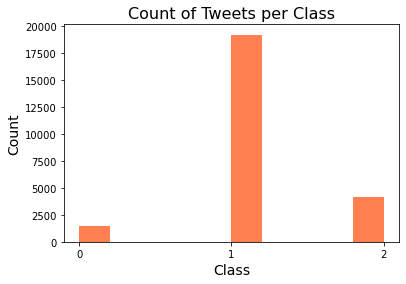

In [329]:
import matplotlib  
import matplotlib.pyplot as plt 

plt.hist(hate_speech_df['class'], color = 'coral')
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1,2])
plt.xlabel('Class', fontsize=14)
plt.title('Count of Tweets per Class', fontsize = 16)

The dataset is unbalanced in favour of tweets containing offensive language compared to hate speech or tweets without any insult.

## Preprocessing of the tweets

In [209]:
tweet=hate_speech_df.tweet

In [210]:
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [42]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk

In [211]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")


other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)

hate_speech_df['processed_tweets'] = processed_tweets
print(hate_speech_df[["tweet","processed_tweets"]].head(10))

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

## Visualizations

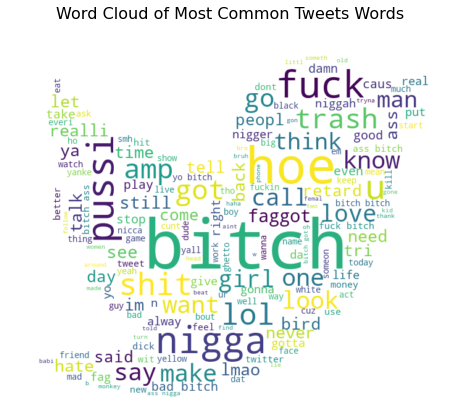

In [334]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

mask = np.array(Image.open('twitter_bird.JPG'))
all_words = ' '.join([text for text in hate_speech_df['processed_tweets'] ])
wordcloud = WordCloud(mask=mask, width=800, height=500, random_state=21, min_font_size = 10, max_font_size=110, background_color="white").generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Most Common Tweets Words', fontsize = 16)
plt.show()

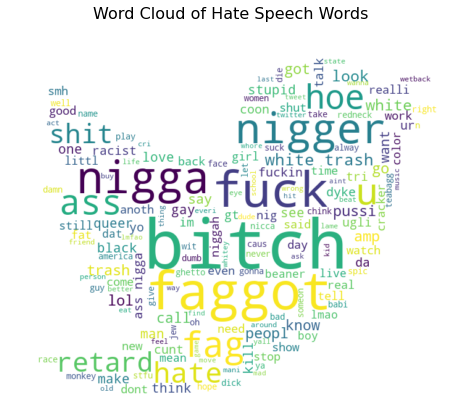

In [335]:
# visualizing which of the word is most commonly used for hate speech
hate_words = ' '.join([text for text in hate_speech_df['processed_tweets'][hate_speech_df['class'] == 0]])
wordcloud = WordCloud(mask = mask, width=800, height=500, random_state=21,min_font_size = 10, max_font_size=110, background_color="white").generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Hate Speech Words', fontsize = 16)
plt.show()

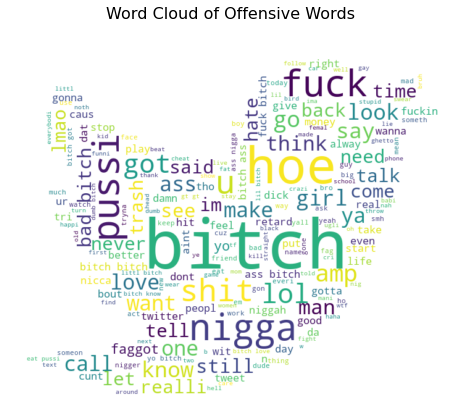

In [336]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in hate_speech_df['processed_tweets'][hate_speech_df['class'] == 1]])
wordcloud = WordCloud(mask = mask, width=800, height=500, random_state=21, min_font_size=10, max_font_size=110, background_color="white").generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Offensive Words', fontsize = 16)
plt.show()

## Feature Engineering

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re

In [315]:
#TF-IDF Features-F1
#TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. 
#This is done by multiplying two metrics: how many times a word appears in a document, 
#and the inverse document frequency of the word across a set of documents.

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(hate_speech_df['processed_tweets'])
tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

### Sentiment Analysis, using polarity scores as features

In [316]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import nltk
nltk.download('vader_lexicon')
import pandas as panda

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/maevamecker/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [317]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#Here we use the original tweets, not the pre processed ones

new_features = panda.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [318]:
# F2-Concatenation of tf-idf scores and sentiment scores
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape
modelling_features_df = pd.DataFrame(modelling_features)
modelling_features_df

,0,1,2,3,4,5,6,7,8,9,...,6438,6439,6440,6441,6442,6443,6444,6445,6446,6447
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


### Doc2vec

In [319]:
# create doc2vec vector columns
# Initialize and train the model
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#The input for a Doc2Vec model should be a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#A good practice is using the indexes of sentences as the tags.
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(hate_speech_df["processed_tweets"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
# window- The maximum distance between the current and predicted word within a sentence.
# mincount-Ignores all words with total frequency lower than this.
# workers -Use these many worker threads to train the model
#  Training Model - distributed bag of words (PV-DBOW) is employed.
model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

#infer_vector - Infer a vector for given post-bulk training document.
# Syntax- infer_vector(doc_words, alpha=None, min_alpha=None, epochs=None, steps=None)
# doc_words-A document for which the vector representation will be inferred.

# transform each document into a vector data
doc2vec_df = hate_speech_df["processed_tweets"].apply(lambda x: model.infer_vector(x.split(" "))).apply(panda.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.013732,0.044971,0.007433,-0.086339,0.064151
1,-0.169714,0.122607,-0.099727,0.106106,0.109682
2,-0.016409,-0.030811,0.035860,0.039585,0.015028
3,0.038090,-0.048309,0.050874,0.071960,0.022757
4,-0.180741,-0.077078,0.003759,0.108322,-0.038017
...,...,...,...,...,...
24778,-0.178522,-0.026358,-0.112955,0.036392,-0.018853
24779,-0.020032,-0.024130,-0.064821,-0.015449,0.036062
24780,-0.058415,0.100284,-0.114037,-0.014016,-0.053130
24781,-0.102127,0.060342,-0.113034,0.088885,0.094764


In [320]:
# concatenation of tf-idf scores, sentiment scores and doc2vec columns
modelling_features = np.concatenate([tfidf_a,final_features,doc2vec_df],axis=1)
modelling_features.shape
modelling_features_without_words = np.concatenate([final_features,doc2vec_df],axis=1)

### Enhanced features

In [321]:
#Using TFIDF with sentiment scores,doc2vec and enhanced features
from textstat.textstat import *

def additional_features(tweet): 
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    # avg_syl = total syllables/ total words
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    #  Flesch–Kincaid readability tests are readability tests 
    #  designed to indicate how difficult a passage in English is to understand. 
    # There are two tests, the Flesch Reading Ease, and the Flesch–Kincaid Grade 
    # A text with a comparatively high score on FRE test should have a lower score on the FKRA test.
    
    ###Modified FK grade, where avg words per sentence is : just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

fFeatures = get_additonal_feature_array(processed_tweets)

df_fFeatures = pd.DataFrame(fFeatures)
df_fFeatures

,0,1,2,3,4,5,6,7
0,3.7,84.90,12.0,1.3333,50.0,50.0,9.0,9.0
1,2.6,95.69,13.0,1.1818,49.0,49.0,11.0,10.0
2,2.3,92.97,10.0,1.2500,42.0,42.0,8.0,8.0
3,1.3,91.00,4.0,1.3332,16.0,16.0,3.0,3.0
4,1.0,103.70,10.0,1.1111,46.0,46.0,9.0,8.0
...,...,...,...,...,...,...,...,...
24778,1.0,103.70,10.0,1.1111,49.0,49.0,9.0,9.0
24779,0.8,103.54,9.0,1.1250,47.0,47.0,8.0,8.0
24780,2.5,95.17,12.0,1.2000,51.0,51.0,10.0,10.0
24781,-1.4,116.15,6.0,1.0000,30.0,30.0,6.0,6.0


In [322]:
tfidf_a = tfidf.toarray()
modelling_features_enhanced = np.concatenate([tfidf_a,final_features,doc2vec_df,fFeatures],axis=1)
modelling_features_enhanced.shape

(24783, 6461)

## Trying different algorithms

In [323]:
final_features = np.concatenate([tfidf_a,final_features,fFeatures],axis=1)
final_features.shape

(24783, 6456)

In [324]:
import seaborn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Logistic Regression

In [313]:
X = panda.DataFrame(final_features)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       279
           1       0.81      0.97      0.88      3852
           2       0.63      0.23      0.33       826

    accuracy                           0.80      4957
   macro avg       0.48      0.40      0.41      4957
weighted avg       0.73      0.80      0.74      4957

Logistic Regression, Accuracy Score: 0.795239055880573


### Random Forest

In [268]:
X = panda.DataFrame(final_features)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

KeyboardInterrupt: 

### Linear SVC

In [325]:
X = panda.DataFrame(final_features)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train,y_train)
y_preds = support.predict(X_test)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.35      0.53      0.42       279
           1       0.97      0.84      0.90      3852
           2       0.67      0.96      0.79       826

    accuracy                           0.85      4957
   macro avg       0.66      0.78      0.70      4957
weighted avg       0.88      0.85      0.86      4957

Linear SVC, Accuracy Score: 0.8456727859592496


### KNeighborsClassifier

In [466]:
from sklearn.neighbors import KNeighborsClassifier
X = panda.DataFrame(modelling_features_enhanced)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_preds = neigh.predict(X_test)
acc4=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc4 )

              precision    recall  f1-score   support

           0       0.09      0.08      0.08       427
           1       0.80      0.89      0.84      5747
           2       0.37      0.19      0.25      1261

    accuracy                           0.73      7435
   macro avg       0.42      0.39      0.39      7435
weighted avg       0.69      0.73      0.70      7435

KNN, Accuracy Score: 0.7268325487558843


### SVM

In [ ]:
from sklearn import svm
# fit the model and get the separating hyperplane
X = panda.DataFrame(modelling_features_enhanced)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
clf = svm.SVC()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
acc6=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc6 )

### Gradient descent

In [27]:
from sklearn.linear_model import SGDClassifier
X = panda.DataFrame(modelling_features_enhanced)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
sdgc = SGDClassifier()
sdgc.fit(X_train,y_train)
y_preds = sdgc.predict(X_test)
acc7=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc7 )

              precision    recall  f1-score   support

           0       0.17      0.15      0.16       427
           1       0.83      0.96      0.89      5747
           2       0.87      0.22      0.36      1261

    accuracy                           0.79      7435
   macro avg       0.62      0.45      0.47      7435
weighted avg       0.80      0.79      0.76      7435

SVM, Accuracy Score: 0.7921990585070612


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = panda.DataFrame(modelling_features_enhanced)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train,y_train)
y_preds = dt.predict(X_test)
acc8=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Gradient Boosting, Accuracy Score:" ,acc8 )

### Running the models Using TFIDF with sentiment scores,doc2vec and enhanced features

In [136]:
from sklearn.model_selection import train_test_split

In [186]:
#line if reshaping is needed : Y = pd.factorize(y)[0].reshape(-1, 1) 
#X = X.iloc[:, :1].values
X = panda.DataFrame(final_features)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

# Grid Search

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

Tune = LinearSVC(random_state=20)

param_grid = {
    'multi_class': ['ovr', 'crammer_singer'],
    'loss' : ['squared_hinge']
    #'penalty': ['l1','l2'] 
}


#param grid for random forest
#param_grid = {
    #'min_samples_split': [3], 
    #'n_estimators' : [100], #300
    #'max_depth': [3] #15,20,25
#}

#Param grid for Linear SVC
#param_grid = {
    #'multi_class': ['ovr', 'crammer_singer'],
    #'loss' : ['hinge', 'squared_hinge'],
    #'penalty': ['l1', 'l2'] 
        #}

cv = StratifiedKFold(n_splits=2, random_state = 0)


scorers = {
    'precision_score': make_scorer(precision_score, average = 'micro'),
    'recall_score': make_scorer(recall_score, average = 'micro'),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score, average = 'micro')
}


In [189]:
def grid_search_wrapper(refit_score='precision_score'):


    best_clf = GridSearchCV(Tune, param_grid, scoring=scorers, refit=refit_score,
                           cv=cv, return_train_score=True, verbose = 1)
    best_clf.fit(X_train, y_train)

    # make the predictions
    y_pred = best_clf.predict(y_test)

    print('Best params for {}'.format(refit_score))
    print(best_clf.best_params_)
    
    return best_clf

In [190]:
import warnings 
warnings.filterwarnings("ignore")
grid_search = grid_search_wrapper(refit_score='precision_score') 

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [144]:
#Implement here the parameters given by grid search
model = LinearSVC(loss = 'hinge', multi_class= 'ovr', penalty = 'l2')
model.fit(X_train, y_train)

LinearSVC(loss='hinge')

In [150]:
y_preds = model.predict(X_test)

# Evaluating our model

In [146]:
report = classification_report( y_test, y_preds )

In [147]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.24      0.38       826
           1       0.81      0.99      0.89      3852
           2       0.43      0.03      0.06       279

    accuracy                           0.81      4957
   macro avg       0.71      0.42      0.44      4957
weighted avg       0.81      0.81      0.76      4957



In [81]:
import seaborn
from sklearn.metrics import confusion_matrix

# Testing our model

In [82]:
def preprocess(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

In [251]:
def tfidf_vectorizer(tweet):
    tweet = pd.Series(tweet)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=1, min_df=1, max_features=10000)
    tfidf_string = tfidf_vectorizer.fit_transform(tweet)
    tfidf_array = tfidf_string.toarray()
    return tfidf_array

In [252]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis_string(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

In [253]:
def doc2vec(tweet):
    #The input for a Doc2Vec model should be a list of TaggedDocument(['list','of','word'], [TAG_001]). 
    #A good practice is using the indexes of sentences as the tags.
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tweet.apply(lambda x: x.split(" ")))]

    # train a Doc2Vec model with our text data
    # window- The maximum distance between the current and predicted word within a sentence.
    # mincount-Ignores all words with total frequency lower than this.
    # workers -Use these many worker threads to train the model
    #  Training Model - distributed bag of words (PV-DBOW) is employed.
    model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

    #infer_vector - Infer a vector for given post-bulk training document.
    # Syntax- infer_vector(doc_words, alpha=None, min_alpha=None, epochs=None, steps=None)
    # doc_words-A document for which the vector representation will be inferred.

    # transform each document into a vector data
    doc2vec_df = tweet.apply(lambda x: model.infer_vector(x.split(" "))).apply(panda.Series)
    doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
    doc2vec_array = doc2vec_df.to_numpy()
    return doc2vec_array

In [254]:
from textstat.textstat import *

def additional_features(tweet): 
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    # avg_syl = total syllables/ total words
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    #  Flesch–Kincaid readability tests are readability tests 
    #  designed to indicate how difficult a passage in English is to understand. 
    # There are two tests, the Flesch Reading Ease, and the Flesch–Kincaid Grade 
    # A text with a comparatively high score on FRE test should have a lower score on the FKRA test.
    
    ###Modified FK grade, where avg words per sentence is : just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

In [255]:
from sklearn.preprocessing import StandardScaler
def get_predictions(tweet):
    #Convert the string to a panda serie in order to apply the following functions 
    tweet = pd.Series(tweet)
    #Get the sentiment analysis of the un-preprocessed string
    #we need to apply this function when the string is not yet pre processed in order to keep the whole meaning
    #of the sentence, like the # for exemple 
    array_sentiment_analysis = sentiment_analysis_array(tweet)
    #Now that we have extract the sentiment from the sentence, let pre-process our tweet 
    preprocessed_tweet = preprocess(tweet)
    #We convert our string into a matrix 
    array_tfidf = tfidf_vectorizer(tweet)
    #Add the doc2vec features 
    #array_doc2vec = doc2vec(tweet)
    #Add additional featutre 
    final_feature = get_additonal_feature_array(tweet)
    #Concatenate all the features 
    features_tweet_test = np.concatenate([array_tfidf,array_sentiment_analysis,final_feature],axis=1)
    #Transform our array to a dataframe 
    df = pd.DataFrame(features_tweet_test)
    #df = df.iloc[:, :1].values
    #We apply our model to our tweet 
    pred = model.predict(df)
    #Re code the labels 
    if pred == 0:
        return "Hate speech"
    elif pred == 1:
        return "Offensive language"
    elif pred == 2:
        return "Neither"
    else:
        return "No label"
    return pred

In [256]:
tweet_test = "abusive or threatening speech or writing that expresses prejudice against a particular group, especially on the basis of race, religion, or sexual orientation."

In [257]:
get_predictions(tweet_test)

ValueError: X has 56 features per sample; expecting 6456